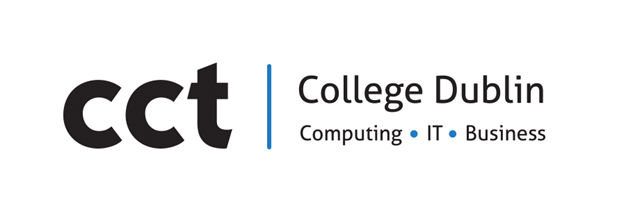

<h1 align="center">CA2 - Machine Learning</h1>
<h3 align="center">Lecturer: David McQuaid</h3>
<h3 align="center">Caio Machado de Oliveira</h3>
<h4 align="center">ID: 2020351</h4>
<h4 align="center">May/2024</h4>

In [98]:
#Importing all libraries

import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.datasets import make_regression
from sklearn.metrics import confusion_matrix, classification_report

# TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as k
from tensorflow.keras.regularizers import l2

# NLTK and TextBlob libraries
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from textblob import download_corpora, TextBlob

# Imbalanced-learn library
from imblearn.over_sampling import SMOTE, ADASYN



import joblib
import re
import string




In [39]:
# Download NLTK corpora
nltk.download('stopwords')
nltk.download('wordnet')
download_corpora.download_all()
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data]

True

# Neural Network - Part I

In [3]:
# importing dataset
filename = 'BankRecords.csv'
data = pd.read_csv(filename)


In [4]:
data.head()

ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No         No  
1                Yes         No             No         No  
2                 No         No             No         No  
3                 No         No             No         No  
4                 No         No             No        Yes

## EDA - Exploratory Data Analysis

### Numerical Values

When first looking at the numerical features and its attributes, it is noticed that the feature "Experience(Years)" contain negative values that might cause problems in further applications.
It was identified that the features 'ID' and 'Sort Code' are not important for this application.

In [5]:
# Checking numerical values
data.describe()

ID          Age  Experience(Years)  Income(Thousands's)  \
count  5000.000000  5000.000000        5000.000000          5000.000000   
mean   2500.500000    45.338400          20.104600            73.774200   
std    1443.520003    11.463166          11.467954            46.033729   
min       1.000000    23.000000          -3.000000             8.000000   
25%    1250.750000    35.000000          10.000000            39.000000   
50%    2500.500000    45.000000          20.000000            64.000000   
75%    3750.250000    55.000000          30.000000            98.000000   
max    5000.000000    67.000000          43.000000           224.000000   

          Sort Code       Family  Credit Score  Mortgage(Thousands's)  
count   5000.000000  5000.000000   5000.000000            5000.000000  
mean   93152.503000     2.396400      1.937913              56.498800  
std     2121.852197     1.147663      1.747666             101.713802  
min     9307.000000     1.000000      0.000000               0.000000  
25%    91911.000000     1.000000      0.700000               0.000000  
50%    93437.000000     2.000000      1.500000               0.000000  
75%    94608.000000     3.000000      2.500000             101.000000  
max    96651.000000     4.000000     10.000000             635.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [7]:
data.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

### Categorical Values

It is important to check que unique values to check for mispelling. '.unique()' allow us to visualize it. '.value_counts()' let us count each value on each feature. 

In [8]:
print(data['Education'].value_counts())
print(data['Education'].unique())

print("\n")
print(data['Personal Loan'].value_counts())
print(data['Personal Loan'].unique())

print("\n")
print(data['Securities Account'].value_counts())
print(data['Securities Account'].unique())

print("\n")
print(data['CD Account'].value_counts())
print(data['CD Account'].unique())

print("\n")
print(data['Online Banking'].value_counts())
print(data['Online Banking'].unique())


print("\n")
print(data['CreditCard'].value_counts())
print(data['CreditCard'].unique())


Education
Diploma    2096
Masters    1501
Degree     1403
Name: count, dtype: int64
['Diploma' 'Degree' 'Masters']


Personal Loan
No     4520
Yes     480
Name: count, dtype: int64
['No' 'Yes']


Securities Account
No     4478
Yes     522
Name: count, dtype: int64
['Yes' 'No']


CD Account
No     4698
Yes     302
Name: count, dtype: int64
['No' 'Yes']


Online Banking
Yes    2984
No     2016
Name: count, dtype: int64
['No' 'Yes']


CreditCard
No     3530
Yes    1470
Name: count, dtype: int64
['No' 'Yes']


## Data Preparation

To prepare the data for a model application demand understanding of what will and won't be relevant, and may or may not affect the model accuracy.
After describing the numerical values on the EDA section, negative values were found on 'Experience(Years)' and will be removed as it might affect the model accuracy.
Was identified that 'ID' and 'Sort Code' are irrelevant for our model application. 

In [9]:
# Drop the 'ID' and 'Sort Code' columns and rename Income column for convenience
data = data.drop(['ID', 'Sort Code'], axis=1)
data = data.rename(columns={'Income(Thousands\'s)': 'Income'})

We have addressed that only the 'Experience(Years)' feature contain negative values, now we only need to count and remove the entire row from our dataset

In [10]:
# Count the number of negative observations 
negative_value = (data['Experience(Years)'] < 0).sum().sum()
print(f"Number of negative values on 'Age': {negative_value}")

Number of negative values on 'Age': 52


In [11]:
# Selecting rows with negative values in 'Experience(Years)' column
negative_rows = data[data['Experience(Years)'] < 0]
# Displaying the selected rows
print("Rows with negative values in 'Experience(Years)' column:")
negative_rows

Rows with negative values in 'Experience(Years)' column:


Age  Experience(Years)  Income  Family  Credit Score Education  \
89     25                 -1     113       4      2.300000   Masters   
226    24                 -1      39       2      1.700000    Degree   
315    24                 -2      51       3      0.300000   Masters   
451    28                 -2      48       2      1.750000   Masters   
524    24                 -1      75       4      0.200000   Diploma   
536    25                 -1      43       3      2.400000    Degree   
540    25                 -1     109       4      2.300000   Masters   
576    25                 -1      48       3      0.300000   Masters   
583    24                 -1      38       2      1.700000    Degree   
597    24                 -2     125       2      7.200000   Diploma   
649    25                 -1      82       4      2.100000   Masters   
670    23                 -1      61       4      2.600000   Diploma   
686    24                 -1      38       4      0.600000    Degree   
793    24                 -2     150       2      2.000000   Diploma   
889    24                 -2      82       2      1.600000   Masters   
909    23                 -1     149       1      6.333333   Diploma   
1173   24                 -1      35       2      1.700000    Degree   
1428   25                 -1      21       4      0.400000   Diploma   
1522   25                 -1     101       4      2.300000   Masters   
1905   25                 -1     112       2      2.000000   Diploma   
2102   25                 -1      81       2      1.600000   Masters   
2430   23                 -1      73       4      2.600000   Diploma   
2466   24                 -2      80       2      1.600000   Masters   
2545   25                 -1      39       3      2.400000    Degree   
2618   23                 -3      55       3      2.400000    Degree   
2717   23                 -2      45       4      0.600000    Degree   
2848   24                 -1      78       2      1.800000    Degree   
2876   24                 -2      80       2      1.600000   Masters   
2962   23                 -2      81       2      1.800000    Degree   
2980   25                 -1      53       3      2.400000    Degree   
3076   29                 -1      62       2      1.750000   Masters   
3130   23                 -2      82       2      1.800000    Degree   
3157   23                 -1      13       4      1.000000   Diploma   
3279   26                 -1      44       1      2.000000    Degree   
3284   25                 -1     101       4      2.100000   Masters   
3292   25                 -1      13       4      0.400000   Diploma   
3394   25                 -1     113       4      2.100000   Masters   
3425   23                 -1      12       4      1.000000   Diploma   
3626   24                 -3      28       4      1.000000   Masters   
3796   24                 -2      50       3      2.400000    Degree   
3824   23                 -1      12       4      1.000000   Diploma   
3887   24                 -2     118       2      7.200000   Diploma   
3946   25                 -1      40       3      2.400000    Degree   
4015   25                 -1     139       2      2.000000   Diploma   
4088   29                 -1      71       2      1.750000   Masters   
4116   24                 -2     135       2      7.200000   Diploma   
4285   23                 -3     149       2      7.200000   Diploma   
4411   23                 -2      75       2      1.800000    Degree   
4481   25                 -2      35       4      1.000000   Masters   
4514   24                 -3      41       4      1.000000   Masters   
4582   25                 -1      69       3      0.300000   Masters   
4957   29                 -1      50       2      1.750000   Masters   

      Mortgage(Thousands's) Personal Loan Securities Account CD Account  \
89                        0            No                 No         No   
226                       0            

In [12]:
# Remove rows with negative values in 'Experience(Years)' column
data = data[data['Experience(Years)'] >= 0]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4948 non-null   int64  
 1   Experience(Years)      4948 non-null   int64  
 2   Income                 4948 non-null   int64  
 3   Family                 4948 non-null   int64  
 4   Credit Score           4948 non-null   float64
 5   Education              4948 non-null   object 
 6   Mortgage(Thousands's)  4948 non-null   int64  
 7   Personal Loan          4948 non-null   object 
 8   Securities Account     4948 non-null   object 
 9   CD Account             4948 non-null   object 
 10  Online Banking         4948 non-null   object 
 11  CreditCard             4948 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 502.5+ KB


### Processing features

### StandardScaler () & OneHotEncoder()

Processing the features play a fundamental role in our model. StandardScaler and OneHoteEncoder work together but have diffirent functions. 
StandardScaler is applied to numerical values that have different range ensuring the mean is equal to 0 and the standard deviation is equal to 1. Another option would be MinMaxScaler, which was tested previously and got worse accuracy.
OneHotEncode simply convert categorical variable into numerical, creating a binary column for each category indicating the presence or absence of that category.

In [14]:
# Separate the target variable from the processing 
income = data.pop('Income')

In [15]:
# List of categorical and numerical features
categorical_features = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
numerical_features = ['Age', 'Experience(Years)', 'Family', 'Credit Score', 'Mortgage(Thousands\'s)']

In [16]:
# Creating transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Use drop='first' to avoid multicollinearity

In [17]:
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [18]:
# Apply the transformations
data_preprocessed = preprocessor.fit_transform(data)

In [19]:
# Convert the preprocessed data to a DataFrame for better readability
# Getting feature names for the new columns created by OneHotEncoder
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = numerical_features + list(encoded_columns)

In [20]:
# Create a DataFrame
data_model = pd.DataFrame(data_preprocessed, columns=all_columns)

In [21]:
data_model

Age  Experience(Years)    Family  Credit Score  \
0    -1.816072          -1.709074  1.400757     -0.192215   
1    -0.049224          -0.117679  0.529926     -0.249439   
2    -0.579278          -0.471322 -1.211736     -0.535558   
3    -0.932648          -1.001787 -1.211736      0.437247   
4    -0.932648          -1.090198  1.400757     -0.535558   
...        ...                ...       ...           ...   
4943 -1.462703          -1.532252 -1.211736     -0.020543   
4944 -1.374360          -1.443841  1.400757     -0.878901   
4945  1.540939           1.650538 -0.340905     -0.936125   
4946  1.717624           1.738949  0.529926     -0.821677   
4947 -1.551045          -1.443841  0.529926     -0.650006   

      Mortgage(Thousands's)  Education_Diploma  Education_Masters  \
0                 -0.556228                1.0                0.0   
1                 -0.556228                1.0                0.0   
2                 -0.556228                1.0                0.0   
3                 -0.556228                0.0                0.0   
4                 -0.556228                0.0                0.0   
...                     ...                ...                ...   
4943              -0.556228                0.0                1.0   
4944               0.278590                1.0                0.0   
4945              -0.556228                0.0                1.0   
4946              -0.556228                0.0                0.0   
4947              -0.556228                1.0                0.0   

      Personal Loan_Yes  Securities Account_Yes  CD Account_Yes  \
0                   0.0                     1.0             0.0   
1                   0.0                     1.0             0.0   
2                   0.0                     0.0             0.0   
3                   0.0                     0.0             0.0   
4                   0.0                     0.0             0.0   
...                 ...                     ...             ...   
4943                0.0                     0.0             0.0   
4944                0.0                     0.0             0.0   
4945                0.0                     0.0             0.0   
4946                0.0                     0.0             0.0   
4947                0.0                     0.0             0.0   

      Online Banking_Yes  CreditCard_Yes  
0                    0.0             0.0  
1                    0.0             0.0  
2                    0.0             0.0  
3                    0.0             0.0  
4                    0.0             1.0  
...                  ...             ...  
4943                 1.0             0.0  
4944                 1.0             0.0  
4945                 0.0             0.0  
4946                 1.0             0.0  
4947                 1.0             1.0  

[4948 rows x 12 columns]

In [22]:
# Add target variable back to data
data_model['Income'] = income.values

In [23]:
data_model.head()

Age  Experience(Years)    Family  Credit Score  Mortgage(Thousands's)  \
0 -1.816072          -1.709074  1.400757     -0.192215              -0.556228   
1 -0.049224          -0.117679  0.529926     -0.249439              -0.556228   
2 -0.579278          -0.471322 -1.211736     -0.535558              -0.556228   
3 -0.932648          -1.001787 -1.211736      0.437247              -0.556228   
4 -0.932648          -1.090198  1.400757     -0.535558              -0.556228   

   Education_Diploma  Education_Masters  Personal Loan_Yes  \
0                1.0                0.0                0.0   
1                1.0                0.0                0.0   
2                1.0                0.0                0.0   
3                0.0                0.0                0.0   
4                0.0                0.0                0.0   

   Securities Account_Yes  CD Account_Yes  Online Banking_Yes  CreditCard_Yes  \
0                     1.0             0.0                 0.0             0.0   
1                     1.0             0.0                 0.0             0.0   
2                     0.0             0.0                 0.0             0.0   
3                     0.0             0.0                 0.0             0.0   
4                     0.0             0.0                 0.0             1.0   

   Income  
0      49  
1      34  
2      11  
3     100  
4      45

In [24]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4948 entries, 0 to 4947
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4948 non-null   float64
 1   Experience(Years)       4948 non-null   float64
 2   Family                  4948 non-null   float64
 3   Credit Score            4948 non-null   float64
 4   Mortgage(Thousands's)   4948 non-null   float64
 5   Education_Diploma       4948 non-null   float64
 6   Education_Masters       4948 non-null   float64
 7   Personal Loan_Yes       4948 non-null   float64
 8   Securities Account_Yes  4948 non-null   float64
 9   CD Account_Yes          4948 non-null   float64
 10  Online Banking_Yes      4948 non-null   float64
 11  CreditCard_Yes          4948 non-null   float64
 12  Income                  4948 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 502.7 KB


# Training Data

In [25]:
# Separate features and target variable
X = data_model.drop('Income', axis=1)
y = data_model['Income']

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network 

Neural Network is a subset of machine learning and is known as the backbone of deep learning algorithms. The neural part of the model mimics the neurons in the brain. Neural Network, also called Artificial Neural Network, is made up of node layers, an input layer, hidden layer (one or more), and an output layer (Raschka and Mirjalili, 2019). Each of these nodes are connected to the next one and has a weight and threshold value on them. In the image below we can see a Neural Network of 5 layers. An Input layer, three hidden layers, and an output layer (Grus, 2015).

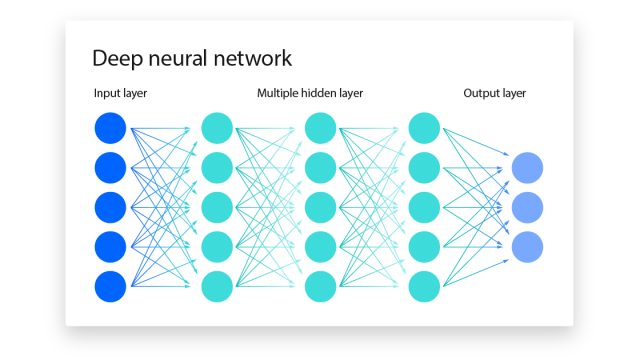 image: (IBM, 2024)


Neural Network support different ways of train models. The most known are feed-forward and back-propagation. Feed-forward simply goes in one direction, from input to output. On the other hand, backpropagation means going in the opposite direction. It takes the total error and goes back to each neurons distributing accordingly minimizing the error and adjusting the weights and biases of the network.  (IBM, 2024)

In our model, we used 'ReLU' for activation function because it is the most used in regression application and dealt better with the complexity of the data (Oppermann, 2021). After running many trainings checking for the best parameters, we got the best results using only one hidden layer with '64 units'. The output layer must have the units equal the expected value of the prediction which is one feature (income) in our case. The activation function used in the output layer in most regression models is 'linear' which is suitable for predicting continuous values. The optimizer uses 'Adam' which is a stochastic gradient descent, and plays a important role in the model minimizing the loss function, such as Mean Squared Error (MSE), used in our model. MSE it is defined as the average of the squared differences between the predicted and actual values. 

So the model is built and ready to run. After exausting trainings, the best results was a score ranging 63% to 65%. 

In [27]:
# Define the Keras Sequential model with tuned hyperparameters
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with a tuned optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

C:\Users\35383\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6204.8740 - val_loss: 1193.7864
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1162.5850 - val_loss: 949.6351
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1026.2363 - val_loss: 873.7989
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 971.6251 - val_loss: 834.4951
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 884.8734 - val_loss: 829.4760
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 889.0414 - val_loss: 820.7981
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 843.2626 - val_loss: 806.7029
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 832.2032 - val_loss: 800.0400
Epoch 9/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 812.6879 - val_loss: 802.3836
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 817.3656 - val_loss: 792.6905
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 880.8678 - val_loss: 78

In [29]:
# Evaluate the model
y_pred_keras = model.predict(X_test)
mse_keras = mean_squared_error(y_test, y_pred_keras)
rmse_keras = np.sqrt(mse_keras)
r2_keras = r2_score(y_test, y_pred_keras)

print(f'Keras MSE: {mse_keras}')
print(f'Keras RMSE: {rmse_keras}')
print(f'Keras R²: {r2_keras}')

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Keras MSE: 741.8295284013656
Keras RMSE: 27.23654765937426
Keras R²: 0.6228255423244113


# Machine Learning Regression Model

In this assignment, we explored two very common used machine learning models: Linear Regression and Random Forest Regressor. Both models are from the Scikt-learn library and have distinct characteristics and are utilized for regression problems in order to predict a continuous target variable based on input features.



## Linear Regression


LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation (scikit-learn developers, 2019).

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables (Andriy Burkov, 2019). Its choice was a decision for modeling using a different approach in order to explorer the nuanses of the dataset when model building. The way Linear Regression model works is fitting a linear equation to the observed data, minimizing the sum of squared residuals between the observed and predicted values. 


The model has a simple application method and do not demand a lot of tune for its hyperparameters. 

After applying the model, the result was a R² score = 0.54 (54%).

In [30]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Evaluate the model
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression RMSE: {rmse_linear}')
print(f'Linear Regression R²: {r2_linear}')

Linear Regression MSE: 891.3765563848292
Linear Regression RMSE: 29.855930003683174
Linear Regression R²: 0.5467901231113048


## Random Forest Regressor

Random Forest Regressor, on the other hand, is an ensemble learning method that leverages the power of multiple decision trees to improve predictive performance and robustness. The random forest algorithm constructs a multitude of decision trees during training and outputs the mean prediction of the individual trees for regression tasks. This approach helps to mitigate overfitting, enhance model accuracy, and handle datasets with higher dimensionality (IBM, 2023). Random Forest Regressor is particularly effective in capturing complex interactions and non-linear relationships between features, making it a versatile and powerful tool for various regression problems.

Random Forests models make use of what is called bagging, which consists of creating many “copies” of the training data (each copy is slightly different from another) and then applying the weak learner to each copy to obtain multiple weak models and then combine them. (Hastie, Tibshirani and Friedman, 2009)

Our model performed well capturing the complexity of the data regardless of the fact that it is not a large dataset. The result we have got applying the model was R² score = 0.79 (79%)

In [32]:
# Tune the parameters for make_regression
X, y = make_regression(
    n_samples=1000,        # Number of samples
    n_features=12,         # Number of features
    n_informative=6,       # Number of informative features
    noise=0.2,             # Standard deviation of Gaussian noise
    bias=0.5,              # Bias term in the underlying linear model
    random_state=42        # Seed for reproducibility
)

In [33]:
# Create a Random Forest Regressor
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)

In [34]:
# Train the model
model_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Evaluate the model
y_pred_RF = model_RF.predict(X_test)
mse_RF = mean_squared_error(y_test, y_pred_RF)
rmse_RF = np.sqrt(mse_RF)
r2_rf = r2_score(y_test, y_pred_RF)

print(f'Random Forest Regressor MSE: {mse_RF}')
print(f'Random Forest Regressor RMSE: {rmse_RF}')
print(f'Random Forest Regressor R²: {r2_rf}')

Random Forest Regressor MSE: 412.9744567065066
Random Forest Regressor RMSE: 20.321772971532443
Random Forest Regressor R²: 0.7900280175179655


# Model Comparison

Based on our models after trained and tested, the Random Forest Regressor performed the best compared to Keras and Linear Regression. Despite of Keras being a Neural Network model and deals much better with complex data in general, the fact that our dataset has not a large number of obsearvation (5000 in total) may have affected the results not capturing the underlying patterns effectively.

In [36]:
print(f'Keras MSE: {mse_keras:.2f}')
print(f'Keras R²: {r2_keras*100:.2f}%')


print(f'\nLinear Regression MSE: {mse_linear:.2f}')
print(f'Linear Regression R²: {r2_linear*100:.2f}%')


print(f'\nRandom Forest Regressor MSE: {mse_RF:.2f}')
print(f'Random Forest Regressor R²: {r2_rf*100:.2f}%')


Keras MSE: 741.83
Keras R²: 62.28%

Linear Regression MSE: 891.38
Linear Regression R²: 54.68%

Random Forest Regressor MSE: 412.97
Random Forest Regressor R²: 79.00%


In [37]:
# New customer details
new_customer = {
    'Age': 30,
    'Experience(Years)': 5,
    'Sort Code': 92011,
    'Family': 2,
    'Credit Score': 1.2,
    'Mortgage(Thousands\'s)': 20,
    'Education': 'Degree',
    'Personal Loan': 'No',
    'Securities Account': 'Yes',
    'CD Account': 'No',
    'Online Banking': 'Yes',
    'CreditCard': 'No'
}

# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Apply the same preprocessing to the new customer data
new_customer_preprocessed = preprocessor.transform(new_customer_df)

# Predict income using the keras model
new_customer_income_keras = model.predict(new_customer_preprocessed)

# Predict income using the linear model
new_customer_income_linear = linear_model.predict(new_customer_preprocessed)


# Predict income using the Random Forest model
new_customer_income_RF = model_RF.predict(new_customer_preprocessed)

# Print the results
print("Predicted income using keras model:", new_customer_income_keras[0])
print("Predicted income using linear model:", new_customer_income_linear[0])
print("Predicted income using Random Forest model:", new_customer_income_RF[0])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted income using keras model: [42.630703]
Predicted income using linear model: 52.40344773459118
Predicted income using Random Forest model: 52.4


C:\Users\35383\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\35383\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [38]:
# joblib.dump(linear_model, 'linear_model.pkl')

# joblib.dump(model_RF, 'model_RF.pkl')

# model.save('my_keras_model.h5')

# # Save the preprocessor
# joblib.dump(preprocessor, 'preprocessor.pkl')

# Semantic Analysis - Part II

In [40]:
file_path = 'reviews.csv'
data_review = pd.read_csv(file_path)


In [ ]:
data_review.head()

In [42]:
data_review = data_review.drop(['Review date', 'Guest name', 'Reservation Number','Review title','Staff','Cleanliness','Location','Facilities','Comfort','Value for money','Property reply' ], axis=1)
data_review.dropna(inplace=True)

### Applying Lemmatizer

In the context of tokenization, another useful technique is word stemming, which is the process of
transforming a word into its root form. It allows us to map related words to the same stem (Raschka and Mirjalili, 2019).
The choice for WordNetLemmatizer() is the fact that it works better with different languages, which is very important in our case as we are dealing with hotel reviews and contain reviews in different languages.

In [43]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]
    return ' '.join(lemmatized_words)


In [44]:
# Combine the 'Positive review' and 'Negative review' columns into a single 'Review' column
data_review['Review'] = data_review['Positive review'].fillna('') + ' ' + data_review['Negative review'].fillna('')

In [45]:
# Apply lemmatization to the 'Review' column
data_review['Review'] = data_review['Review'].apply(lemmatize_text)

In [46]:
data_review.head()

Positive review  \
5    Everything was amazing staff room bar staff ð   
7   Location is great. Room was very clean and com...   
8   Spotless clean food was great and staff where ...   
9     I really loved the room it was lovely and clean   
10  Convenient location, clean and tidy with excel...   

                                      Negative review  Review score  \
5                  Everything was great amazing time           10.0   
7   Staff trying to come into our room with no rea...           8.0   
8    Nothing got what you paid for couldn’t fault it           10.0   
9                                I liked everything!!          10.0   
10  A little run down looking from the outside. Co...           8.0   

                                               Review  
5   Everything be amaze staff room bar staff ð ...  
7   Location be great. Room be very clean and comf...  
8   Spotless clean food be great and staff where v...  
9   I really love the room it be lovely and clean ...  
10  Convenient location, clean and tidy with excel...

In [47]:
data_review = data_review.drop(['Positive review','Negative review' ], axis=1)
data_review.dropna(inplace=True)

In [48]:
data_review.head()

Review score                                             Review
5           10.0  Everything be amaze staff room bar staff ð ...
7            8.0  Location be great. Room be very clean and comf...
8           10.0  Spotless clean food be great and staff where v...
9           10.0  I really love the room it be lovely and clean ...
10           8.0  Convenient location, clean and tidy with excel...

### Applying TextBlob

In [50]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [51]:
# Apply sentiment analysis to 'Review' column
data_review['Review Sentiment'] = data_review['Review'].apply(get_sentiment)

In [52]:
data_review.head()

Review score                                             Review  \
5           10.0  Everything be amaze staff room bar staff ð ...   
7            8.0  Location be great. Room be very clean and comf...   
8           10.0  Spotless clean food be great and staff where v...   
9           10.0  I really love the room it be lovely and clean ...   
10           8.0  Convenient location, clean and tidy with excel...   

   Review Sentiment  
5          Positive  
7          Positive  
8          Positive  
9          Positive  
10         Positive

In [53]:
data_review['Review Sentiment'].value_counts()

Review Sentiment
Positive    1112
Neutral      292
Negative     107
Name: count, dtype: int64

### Visualizing Findings

In [64]:
# Assuming data_review is your DataFrame
data_review['Review score'] = data_review['Review score'].round().astype(int)

<Axes: xlabel='Review score', ylabel='count'>

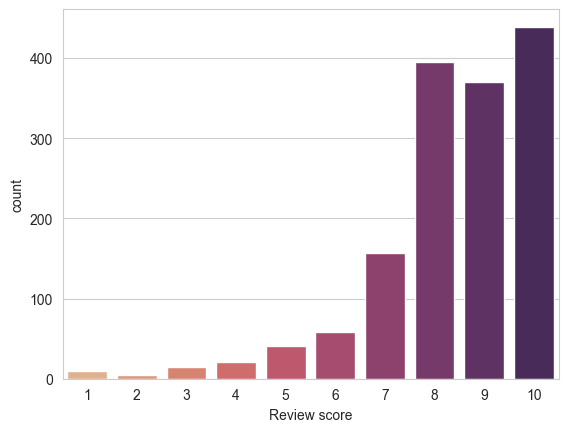

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Review score',hue='Review score',data=data_review, palette='flare', legend=False)

<Axes: xlabel='Review Sentiment', ylabel='count'>

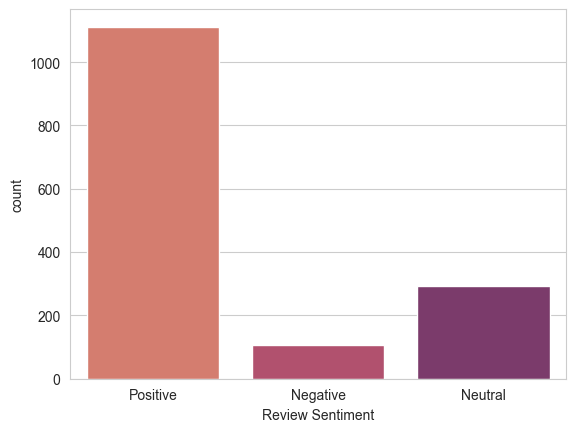

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='Review Sentiment',hue='Review Sentiment',data=data_review, palette='flare', legend=False)

# Data Processing

We will now remove all punctuation marks, lower all the letters, remove stopwords (e.g. the, and, is),and the Unicode emoji formats (e.g. Ã°ÂŸÂ‘Â, meaning "thumbs up") found in our dataset. To accomplish this task, we will use Python's regular expression (regex) library, re , as shown below:


In [73]:
def get_text_processing(text):
    # Remove unwanted characters and keep only letters and numbers
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize and remove stopwords
    stpword = stopwords.words('english')
    words = text.split()
    return ' '.join([word for word in words if word not in stpword])

In [74]:
data_review['Review'] = data_review['Review'].apply(get_text_processing)

In [77]:
data_review.head()

Review score                                             Review  \
5             10  everything amaze staff room bar staff everythi...   
7              8  location great room clean comfortable short st...   
8             10  spotless clean food great staff welcome helpfu...   
9             10      really love room lovely clean like everything   
10             8  convenient location clean tidy excellent staff...   

   Review Sentiment  
5          Positive  
7          Positive  
8          Positive  
9          Positive  
10         Positive

In [78]:
data_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511 entries, 5 to 5284
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review score      1511 non-null   int32 
 1   Review            1511 non-null   object
 2   Review Sentiment  1511 non-null   object
dtypes: int32(1), object(2)
memory usage: 41.3+ KB


In [79]:
data_model = data_review[['Review', 'Review Sentiment']]

In [80]:
one_hot = pd.get_dummies(data_model["Review Sentiment"])
data_model.drop(['Review Sentiment'],axis=1,inplace=True)
data_model = pd.concat([data_model,one_hot],axis=1)
data_model.head()

C:\Users\35383\AppData\Local\Temp\ipykernel_15340\2024612391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.drop(['Review Sentiment'],axis=1,inplace=True)


Review  Negative  Neutral  \
5   everything amaze staff room bar staff everythi...     False    False   
7   location great room clean comfortable short st...     False    False   
8   spotless clean food great staff welcome helpfu...     False    False   
9       really love room lovely clean like everything     False    False   
10  convenient location clean tidy excellent staff...     False    False   

    Positive  
5       True  
7       True  
8       True  
9       True  
10      True

## Spliting Training and Test

In [81]:
X = data_model['Review'].values
y = data_model.drop('Review', axis=1).values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [83]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [87]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
#X_train = X_train.toarray()
#X_test = X_test.toarray()

In [89]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [90]:
# Verify the distribution
print(f"Original dataset shape: {Counter(np.argmax(y_train, axis=1))}")
print(f"Resampled dataset shape: {Counter(np.argmax(y_resampled, axis=1))}")

Original dataset shape: Counter({2: 891, 1: 236, 0: 81})
Resampled dataset shape: Counter({2: 891, 1: 891, 0: 891})


In [91]:
# Combine the resampled data into a DataFrame (Note: X_resampled needs to be converted to a dense format)
data_balanced = pd.DataFrame(X_resampled.toarray(), columns=vect.get_feature_names_out())
data_balanced = pd.concat([data_balanced, pd.DataFrame(y_resampled, columns=one_hot.columns)], axis=1)

In [93]:
model = Sequential()

model.add(Dense(units=128, input_dim=X_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

C:\Users\35383\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
# Train the model with a different batch size and more epochs
history = model.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), epochs=20, batch_size=256, verbose=1, callbacks=[early_stop])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.3500 - loss: 1.0942 - val_accuracy: 0.6832 - val_loss: 1.0722
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4992 - loss: 1.0634 - val_accuracy: 0.6700 - val_loss: 1.0196
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5904 - loss: 0.9881 - val_accuracy: 0.6931 - val_loss: 0.9319
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7062 - loss: 0.8487 - val_accuracy: 0.8383 - val_loss: 0.7446
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8371 - loss: 0.6585 - val_accuracy: 0.8647 - val_loss: 0.5329
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9025 - loss: 0.4737 - val_accuracy: 0.8713 - val_loss: 0.3847
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9416 - loss: 0.3127 - val_accuracy: 0.8845 - val_loss: 0.3385
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9527 - loss: 0.2074 - val_accuracy: 0.8779 - v

In [95]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


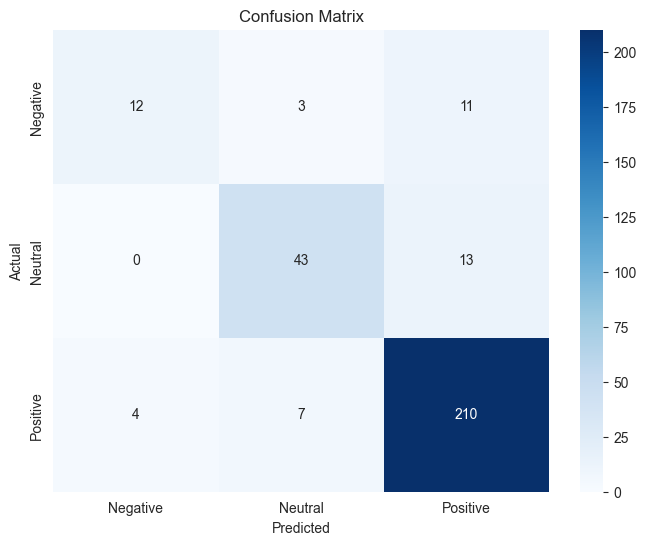

              precision    recall  f1-score   support

    Negative       0.75      0.46      0.57        26
     Neutral       0.81      0.77      0.79        56
    Positive       0.90      0.95      0.92       221

    accuracy                           0.87       303
   macro avg       0.82      0.73      0.76       303
weighted avg       0.87      0.87      0.87       303



In [99]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=one_hot.columns, yticklabels=one_hot.columns)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=one_hot.columns))

# References

IBM (2024). AI vs. machine learning vs. deep learning vs. neural networks | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/think/topics/ai-vs-machine-learning-vs-deep-learning-vs-neural-networks.



Oppermann, A. (2021). Activation Functions in Deep Learning: Sigmoid, tanh, ReLU. [online] KI Tutorials. Available at: https://artemoppermann.com/activation-functions-in-deep-learning-sigmoid-tanh-relu/#:~:text=Activation%20functions%20add%20a%20nonlinear [Accessed 30 May 2024].

Andriy Burkov (2019). THE HUNDRED-PAGE MACHINE LEARNING BOOK. Andriy Burkov

Grus, J. (2015). Data Science from Scratch. ‘O’Reilly Media, Inc.’

Hastie, T., Tibshirani, R. and Friedman, J.H. (2009). The Elements of Statistical Learning. Springer.

Raschka, S. and Mirjalili, V. (2019). Python machine learning : machine learning and deep learning with python, scikit-learn, and tensorflow 2. Birmingham: Packt Publishing, Limited.


IBM (2023). What is Random Forest? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/random-forest.




### MODELS

Chollet, F. (2020). The Sequential model. [online] keras.io. Available at: https://keras.io/guides/sequential_model/.


scikit-learn.org. (n.d.). 3.2.4.3.2. sklearn.ensemble.RandomForestRegressor — scikit-learn 0.23.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.


scikit-learn developers (2019). sklearn.linear_model.LinearRegression — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

